In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

**Step 1: Load and Inspect the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('/content/ASIANPAINT.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

         Date      Symbol Series  Prev Close   Open   High    Low   Last  \
0  2000-01-03  ASIANPAINT     EQ      361.20  370.0  390.0  370.0  385.0   
1  2000-01-04  ASIANPAINT     EQ      381.65  380.0  392.0  375.0  390.0   
2  2000-01-05  ASIANPAINT     EQ      385.55  371.5  390.0  371.5  383.0   
3  2000-01-06  ASIANPAINT     EQ      383.00  384.9  384.9  374.5  375.1   
4  2000-01-07  ASIANPAINT     EQ      377.50  376.0  390.0  370.0  389.0   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  381.65  380.54    3318  1.262617e+11     NaN                 NaN   
1  385.55  383.50    4818  1.847699e+11     NaN                 NaN   
2  383.00  379.81    2628  9.981384e+10     NaN                 NaN   
3  377.50  379.88    3354  1.274114e+11     NaN                 NaN   
4  385.70  383.38    9589  3.676275e+11     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


In [4]:
# Descriptive statistics
print(df.describe())

        Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean   1247.000952  1247.683952  1264.625349  1230.900697  1247.317132   
std    1074.399506  1074.025577  1087.238871  1062.629409  1074.432667   
min     210.750000   210.000000   215.750000   204.000000   210.600000   
25%     415.737500   415.000000   424.950000   410.000000   416.000000   
50%     889.375000   890.000000   903.975000   878.075000   890.000000   
75%    1599.037500  1599.800000  1629.675000  1573.037500  1602.500000   
max    5213.100000  5221.100000  5247.750000  5150.050000  5221.100000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03    2456.000000   
mean   1247.410903  1247.799926  5.096721e+05  6.942919e+13   41346.011401   
std    1074.476439  1075.057438  8.535993e+05  1.443973e+14   36435.449733   
min     210.750000   

In [5]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [7]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,ASIANPAINT,EQ,2517.95,2530.0,2575.00,2530.00,2558.0,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0,0.3037
5302,2021-04-27,ASIANPAINT,EQ,2557.90,2545.0,2579.90,2534.00,2571.0,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0,0.3246
5303,2021-04-28,ASIANPAINT,EQ,2574.35,2588.0,2620.25,2575.00,2612.0,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0,0.4216
5304,2021-04-29,ASIANPAINT,EQ,2614.55,2630.0,2642.00,2570.00,2613.0,2613.45,2607.33,1295346,3.377394e+14,64039.0,447979.0,0.3458
5305,2021-04-30,ASIANPAINT,EQ,2613.45,2595.0,2605.80,2524.05,2529.0,2536.40,2558.66,1384907,3.543512e+14,91934.0,750496.0,0.5419


In [8]:
df.shape

(5306, 15)

**Step 2: Exploratory Data Analysis (EDA)**

In [9]:
# Check for missing values
print(df.isnull().sum())

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64


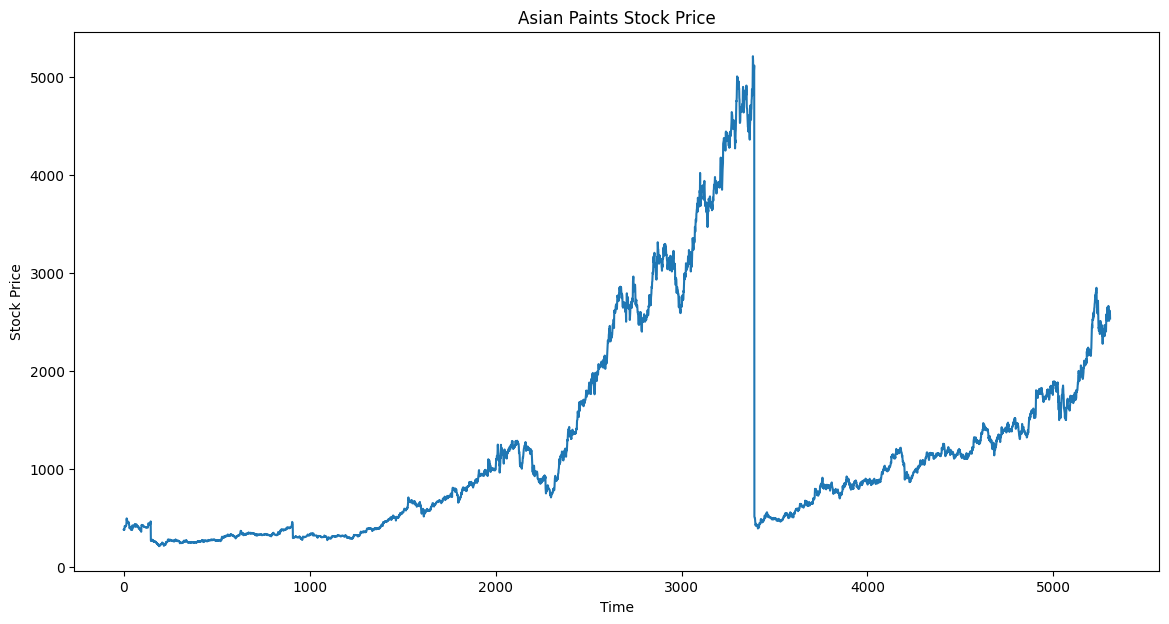

In [11]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('Asian Paints Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [12]:
# Data Preprocessing for all models
# Filling missing values (if any)
df.fillna(method='ffill', inplace=True)

In [13]:
# Feature selection and scaling
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler # Import StandardScaler

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

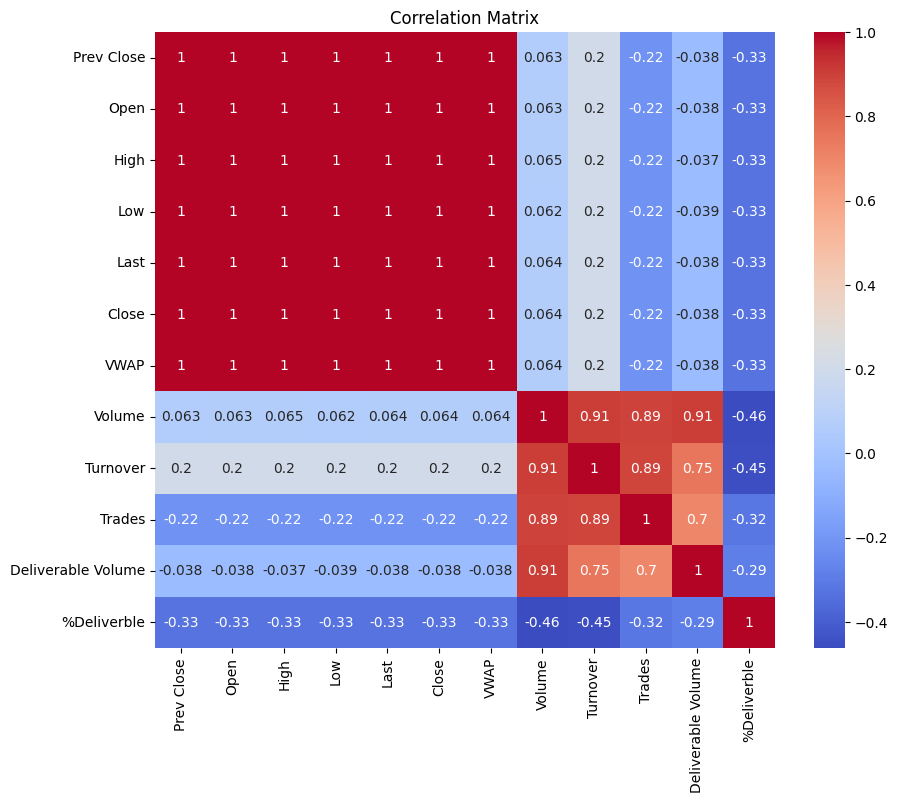

In [14]:
# Select only numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

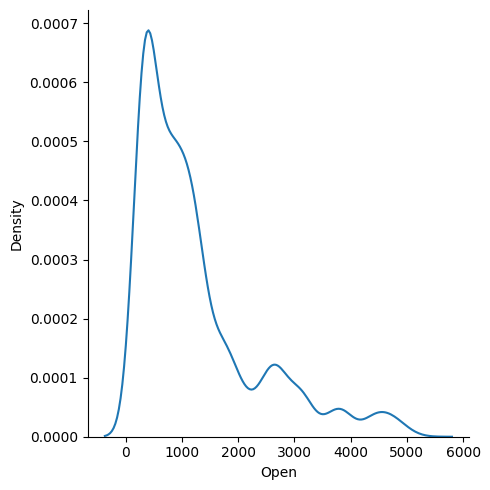

In [15]:
#Open Stock Price According to their density
sns.displot(df["Open"], kind="kde")

<Axes: xlabel='Prev Close', ylabel='High'>

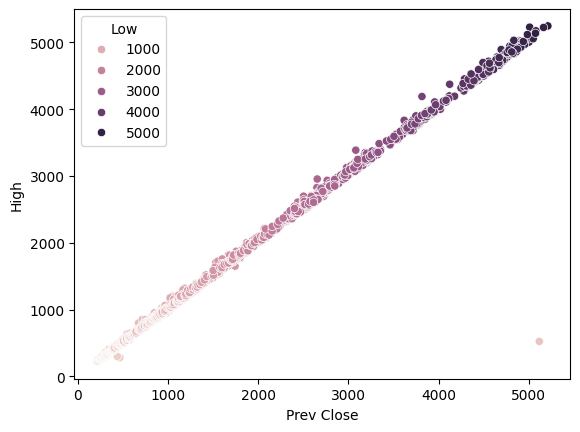

In [16]:
sns.scatterplot(x="Prev Close",y="High",hue="Low",data=df)

array([[<Axes: title={'center': 'Prev Close'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'VWAP'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Turnover'}>],
       [<Axes: title={'center': 'Trades'}>,
        <Axes: title={'center': 'Deliverable Volume'}>,
        <Axes: title={'center': '%Deliverble'}>]], dtype=object)

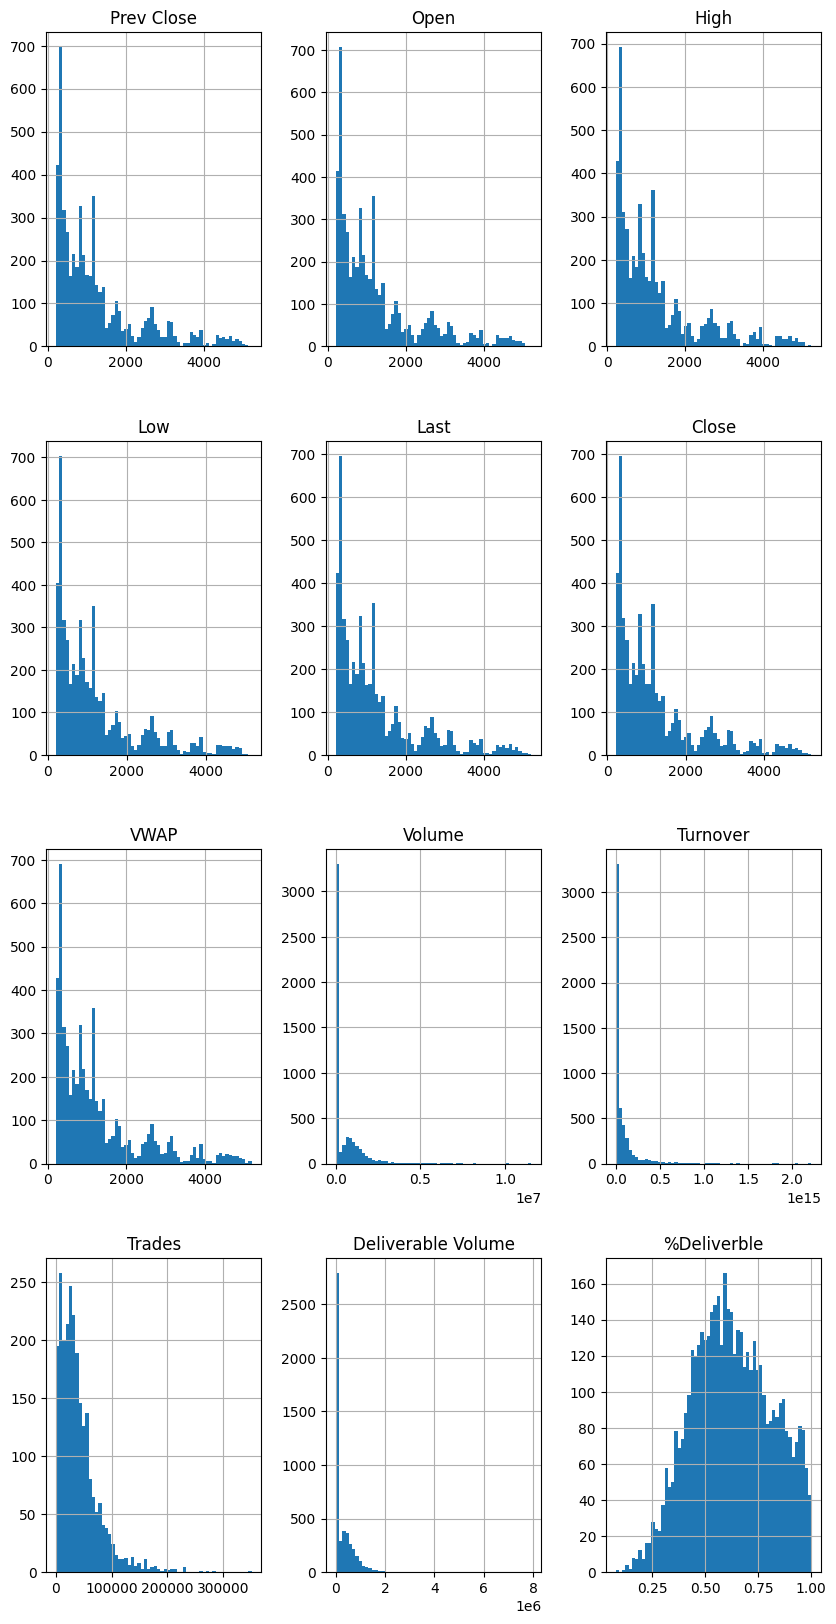

In [17]:
#Make Histogram of All Data set

df.hist(bins=60,figsize=(10,20))

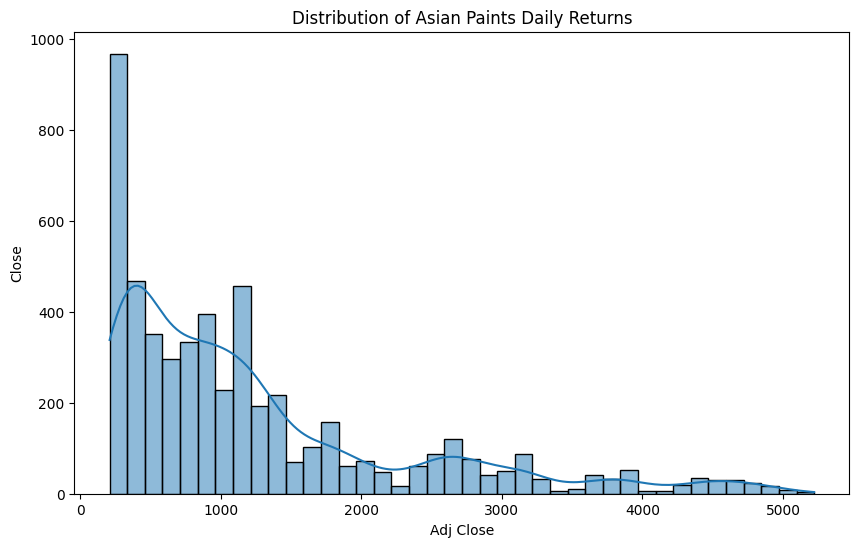

In [18]:
# This Plotation on Stock prices When on Close , Adjacent Close and on Open Stages .

plt.figure(figsize=(10, 6))
sns.histplot(df['Open'].dropna(), bins=40, kde=True)
plt.title('Distribution of Asian Paints Daily Returns')
plt.xlabel('Adj Close')
plt.ylabel('Close')
plt.show()

In [19]:
# Plot Asian Paints High Stock Prices

def volume_analysis(df,cmp_name):
    df['High'].plot(figsize=(10,7),title='Asian Paints '+cmp_name+' Stock Prices',c='orange')
    plt.ylabel('Volume')
    plt.show()

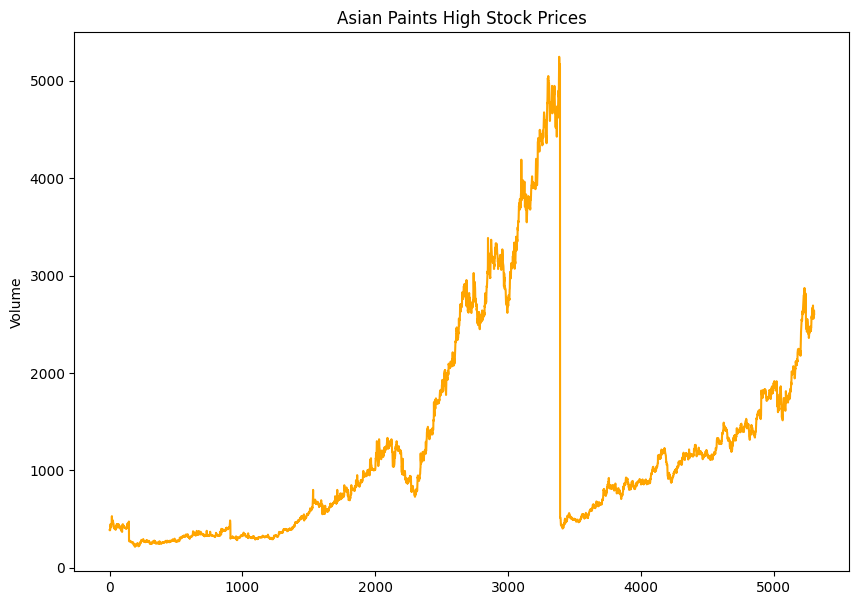

In [20]:
volume_analysis(df,'High')

In [21]:
import tensorflow as tf
print(tf.__version__)

2.15.0


**Step 3: Implementing all Models**

**LSTM**

In [22]:
# Preprocessing the data for LSTM
data = df['Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

# Splitting the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [23]:
# Creating the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [24]:
# Reshaping input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [25]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
# Training the LSTM model
lstm_model.fit(X_train, y_train, batch_size=1, epochs=1)

# Making predictions
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

31/31 [==============================] - 2s 25ms/step


In [27]:
# Evaluating the LSTM model
rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_predictions))
r2_lstm = r2_score(y_test, lstm_predictions)

print(f'LSTM RMSE: {rmse_lstm}')
print(f'LSTM R2 Score: {r2_lstm}')

LSTM RMSE: 1633.862409877926
LSTM R2 Score: -367027297.3151246


In [31]:
# Visualizing the LSTM predictions
train = df[:train_size]

# Adjust the start of the validation set to account for time_step and the reduction in size due to prediction
valid = df[train_size + time_step:]  # Remove the -1

# Slice the valid DataFrame to match the length of predictions
valid = valid[:len(lstm_predictions)]

valid['Predictions'] = lstm_predictions

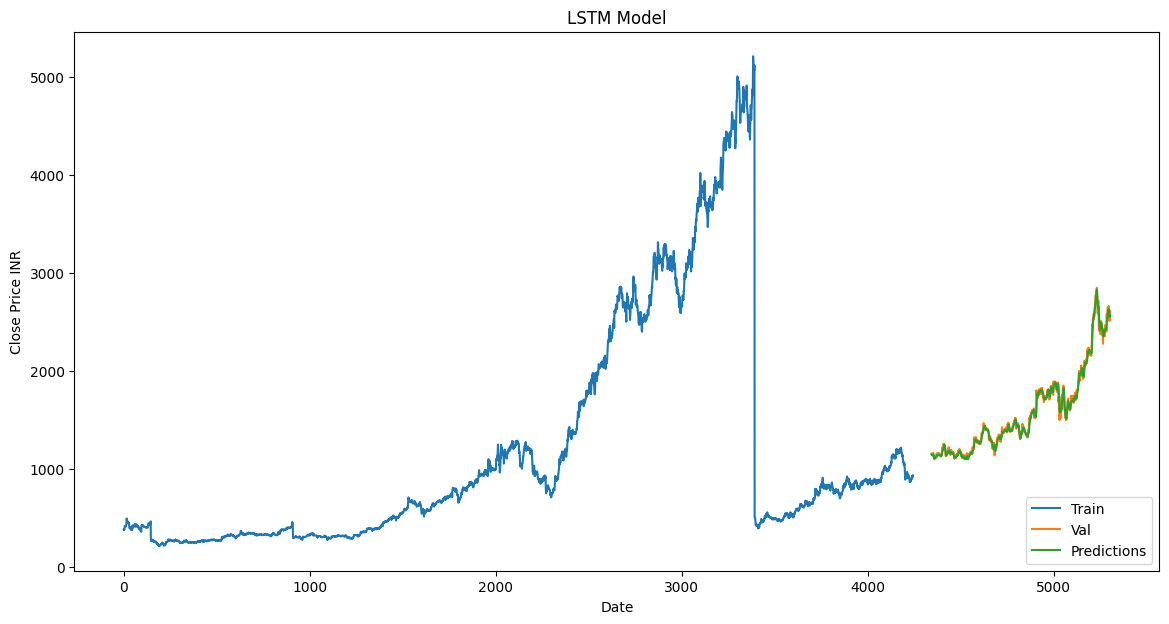

In [33]:
# Visualizing the LSTM predictions
train = df[:train_size]
valid = df[train_size + time_step - 1:] # Adjust the start of the validation set

# Slice the valid DataFrame to match the length of predictions
valid = valid[:len(lstm_predictions)]

valid['Predictions'] = lstm_predictions

plt.figure(figsize=(14, 7))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

**SGD and Random Forest**

In [42]:
# Preparing data for SGD and Random Forest
X = df.drop(['Close', 'Date', 'Symbol'], axis=1) # Drop the 'Date' and 'Symbol' columns
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols) # Print any non-numeric columns

# Option 1: Drop non-numeric columns
X_train = X_train.drop(non_numeric_cols, axis=1)
X_test = X_test.drop(non_numeric_cols, axis=1)

# Option 2: Convert non-numeric columns (if they should be numeric)
# Example: If 'Series' column should represent a numerical category:
# X_train['Series'] = X_train['Series'].astype('category').cat.codes
# X_test['Series'] = X_test['Series'].astype('category').cat.codes

# Handle missing values (NaN) before scaling
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of the column
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Non-numeric columns: Index(['Series'], dtype='object')


In [43]:
# SGD Regressor
sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train_scaled, y_train)

# Making predictions with SGD
sgd_predictions = sgd_regressor.predict(X_test_scaled)

In [44]:
# Evaluating the SGD model
rmse_sgd = np.sqrt(mean_squared_error(y_test, sgd_predictions))
r2_sgd = r2_score(y_test, sgd_predictions)

print(f'SGD RMSE: {rmse_sgd}')
print(f'SGD R2 Score: {r2_sgd}')

SGD RMSE: 23.310457132452886
SGD R2 Score: 0.9994750232638764


In [45]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Making predictions with Random Forest
rf_predictions = rf_regressor.predict(X_test)

In [46]:
# Evaluating the Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
r2_rf = r2_score(y_test, rf_predictions)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R2 Score: {r2_rf}')

Random Forest RMSE: 6.573877994264459
Random Forest R2 Score: 0.9999582475699567


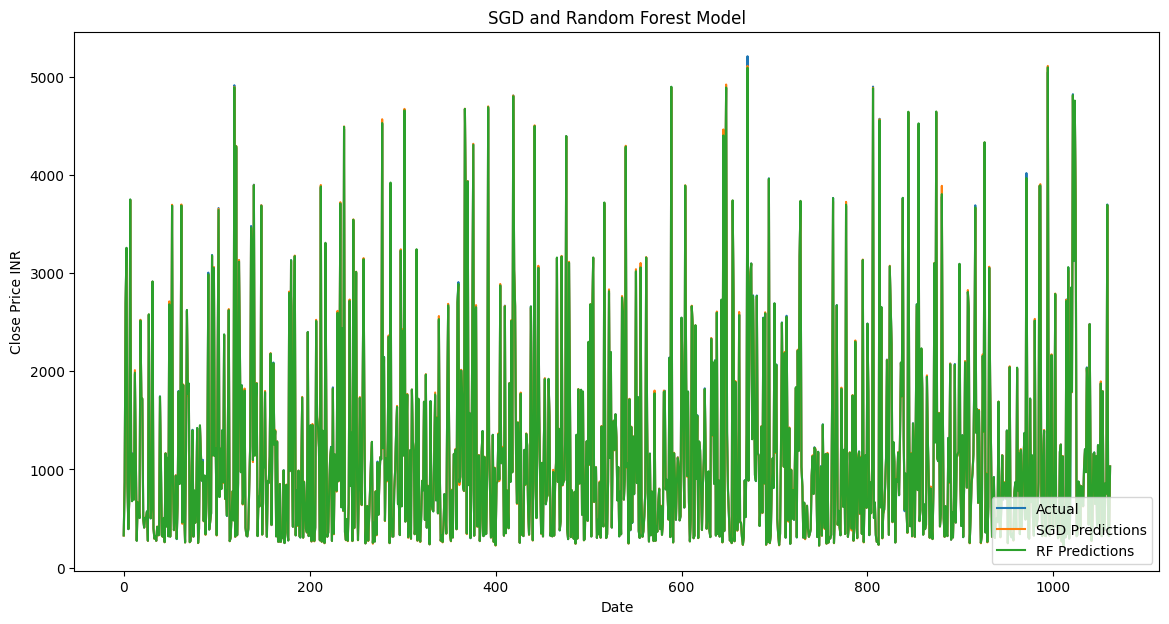

In [47]:
# Visualizing SGD and Random Forest predictions
plt.figure(figsize=(14, 7))
plt.title('SGD and Random Forest Model')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.plot(y_test.values, label='Actual')
plt.plot(sgd_predictions, label='SGD Predictions')
plt.plot(rf_predictions, label='RF Predictions')
plt.legend(['Actual', 'SGD Predictions', 'RF Predictions'], loc='lower right')
plt.show()